<br><br>

<center><h2><b><u>DS605: Fundamentals of Machine Learning</u></b></h2></center>

<center><h3><b>Car Crash Analysis Model Training</b></h3></center>

In [1]:
import numpy as np
import pandas as pd

In [26]:
data = pd.read_csv('./data/train.csv')

In [5]:
test = pd.read_csv('./data/test.csv')

### __EDA__

In [27]:
# deleting the 'CASENUM' column as it is just the unique identifier
data.drop(columns='CASENUM', inplace=True)

In [4]:
data.head()

PEDS  PERMVIT  VE_TOTAL  MONTH  DAY_WEEK  YEAR  HOUR  HARM_EV  MANCOL  \
0     0        2         2      2         5  2018  18.0     12.0     1.0   
1     1        2         2     12         7  2018  20.0     12.0     6.0   
2     0        1         1      5         3  2019  17.0     44.0     0.0   
3     0        1         1      3         4  2022   0.0     33.0     0.0   
4     1        1         1      1         4  2020  22.0      9.0     0.0   

   RELJCT  ...  VPROFILE  VSURCOND   AGE  SEX  AIR_BAG  EJECTION  ALCHL  \
0     0.0  ...       1.0       1.0  46.0  1.0     20.0       0.0    0.0   
1     0.0  ...       1.0       1.0  37.0  1.0      1.0       0.0    NaN   
2     NaN  ...       1.0       1.0  31.0  2.0     20.0       0.0    0.0   
3     0.0  ...       1.0       1.0  31.0  1.0     20.0       NaN    1.0   
4     0.0  ...       1.0       1.0  45.0  1.0      NaN       0.0    0.0   

   DRUGS  OVER_SPD  IS_FATAL  
0    0.0       NaN         0  
1    NaN      20.0         1  
2    NaN       NaN         0  
3    1.0      15.0         1  
4    NaN       NaN         0  

[5 rows x 36 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411108 entries, 0 to 411107
Data columns (total 36 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   PEDS      411108 non-null  int64  
 1   PERMVIT   411108 non-null  int64  
 2   VE_TOTAL  411108 non-null  int64  
 3   MONTH     411108 non-null  int64  
 4   DAY_WEEK  411108 non-null  int64  
 5   YEAR      411108 non-null  int64  
 6   HOUR      410916 non-null  float64
 7   HARM_EV   410862 non-null  float64
 8   MANCOL    410910 non-null  float64
 9   RELJCT    383905 non-null  float64
 10  TYP_INT   389550 non-null  float64
 11  REL_ROAD  410913 non-null  float64
 12  WRK_ZONE  411108 non-null  int64  
 13  LGT_COND  410910 non-null  float64
 14  WEATHER   401142 non-null  float64
 15  NUMOCCS   383128 non-null  float64
 16  MDL_YEAR  409861 non-null  float64
 17  MAKE      398655 non-null  float64
 18  MODEL     394414 non-null  float64
 19  BODY_TYP  403448 non-null  float64
 20  J_KN

In [6]:
data.describe()

PEDS        PERMVIT       VE_TOTAL          MONTH  \
count  411108.000000  411108.000000  411108.000000  411108.000000   
mean        0.118446       2.525516       1.874315       6.766696   
std         0.370131       1.946415       1.093549       3.412064   
min         0.000000       1.000000       1.000000       1.000000   
25%         0.000000       1.000000       1.000000       4.000000   
50%         0.000000       2.000000       2.000000       7.000000   
75%         0.000000       3.000000       2.000000      10.000000   
max        73.000000      75.000000      59.000000      12.000000   

            DAY_WEEK           YEAR           HOUR        HARM_EV  \
count  411108.000000  411108.000000  410916.000000  410862.000000   
mean        4.116512    2020.022447      13.332160      15.390966   
std         1.962350       1.985049       5.798051      10.766839   
min         1.000000    2017.000000       0.000000       1.000000   
25%         2.000000    2018.000000       9.000000      12.000000   
50%         4.000000    2020.000000      14.000000      12.000000   
75%         6.000000    2022.000000      18.000000      12.000000   
max         7.000000    2023.000000      23.000000      93.000000   

              MANCOL         RELJCT  ...       VPROFILE       VSURCOND  \
count  410910.000000  383905.000000  ...  358923.000000  393484.000000   
mean        2.549035       0.061041  ...       1.372698       1.185517   
std         2.871335       0.239406  ...       1.182876       0.785520   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       1.000000       1.000000   
50%         1.000000       0.000000  ...       1.000000       1.000000   
75%         6.000000       0.000000  ...       1.000000       1.000000   
max        11.000000       1.000000  ...       6.000000      11.000000   

                 AGE            SEX        AIR_BAG       EJECTION  \
count  409584.000000  409610.000000  375318.000000  387537.000000   
mean       40.684433       1.356322      15.720426       0.040956   
std        17.944757       0.478912       6.834490       0.306121   
min         4.000000       1.000000       1.000000       0.000000   
25%        25.000000       1.000000       9.000000       0.000000   
50%        37.000000       1.000000      20.000000       0.000000   
75%        54.000000       2.000000      20.000000       0.000000   
max       120.000000       2.000000      20.000000       7.000000   

               ALCHL          DRUGS       OVER_SPD       IS_FATAL  
count  386493.000000  250411.000000  235359.000000  411108.000000  
mean        0.080144       0.054143       4.991808       0.298345  
std         0.271516       0.226300      11.861516       0.457532  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       3.000000       1.000000  
max         1.000000       1.000000     117.000000       1.000000  

[8 rows x 36 columns]

In [7]:
data.isnull().sum()

PEDS             0
PERMVIT          0
VE_TOTAL         0
MONTH            0
DAY_WEEK         0
YEAR             0
HOUR           192
HARM_EV        246
MANCOL         198
RELJCT       27203
TYP_INT      21558
REL_ROAD       195
WRK_ZONE         0
LGT_COND       198
WEATHER       9966
NUMOCCS      27980
MDL_YEAR      1247
MAKE         12453
MODEL        16694
BODY_TYP      7660
J_KNIFE          0
SPEED       175742
ROLLOVER         0
ROLINLOC       319
SPEEDLIM     45904
VALIGN       18012
VPROFILE     52185
VSURCOND     17624
AGE           1524
SEX           1498
AIR_BAG      35790
EJECTION     23571
ALCHL        24615
DRUGS       160697
OVER_SPD    175749
IS_FATAL         0
dtype: int64

In [8]:
data.columns

Index(['PEDS', 'PERMVIT', 'VE_TOTAL', 'MONTH', 'DAY_WEEK', 'YEAR', 'HOUR',
       'HARM_EV', 'MANCOL', 'RELJCT', 'TYP_INT', 'REL_ROAD', 'WRK_ZONE',
       'LGT_COND', 'WEATHER', 'NUMOCCS', 'MDL_YEAR', 'MAKE', 'MODEL',
       'BODY_TYP', 'J_KNIFE', 'SPEED', 'ROLLOVER', 'ROLINLOC', 'SPEEDLIM',
       'VALIGN', 'VPROFILE', 'VSURCOND', 'AGE', 'SEX', 'AIR_BAG', 'EJECTION',
       'ALCHL', 'DRUGS', 'OVER_SPD', 'IS_FATAL'],
      dtype='object')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
cat_columns = [
    'MONTH', 'DAY_WEEK', 'YEAR', 'HOUR', 'HARM_EV', 'MANCOL', 'RELJCT', 
    'TYP_INT', 'REL_ROAD', 'WRK_ZONE', 'LGT_COND', 'WEATHER', 'MDL_YEAR',
    'MAKE', 'MODEL', 'BODY_TYP', 'J_KNIFE', 'ROLLOVER', 'ROLINLOC', 'VALIGN',
    'VPROFILE', 'VSURCOND', 'SEX', 'AIR_BAG', 'EJECTION', 'ALCHL', 'DRUGS'
]
num_columns = [
    'PEDS', 'VE_TOTAL', 'PERMVIT', 'NUMOCCS', 'SPEED', 'SPEEDLIM', 'AGE',
    'OVER_SPD'
]
target = 'IS_FATAL'

In [66]:
data = data[num_columns + cat_columns + [target]]

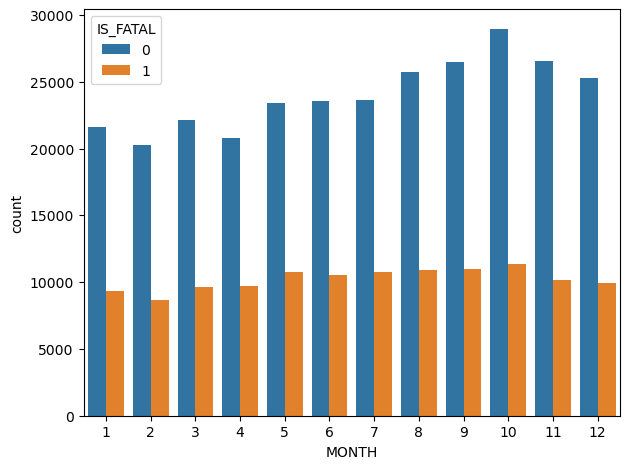

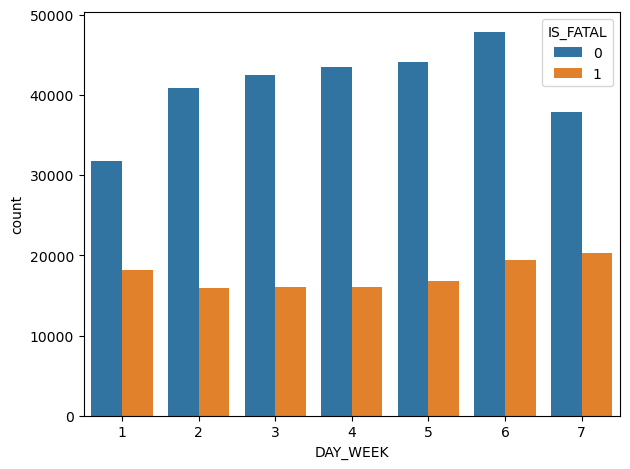

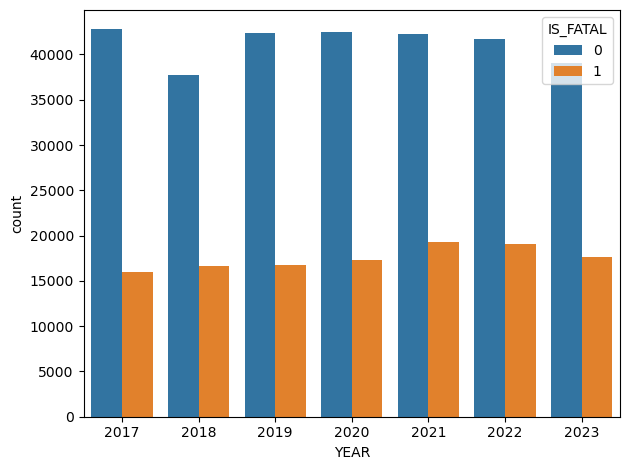

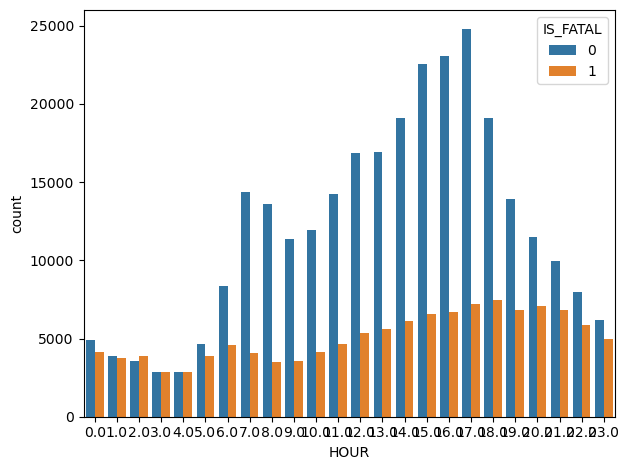

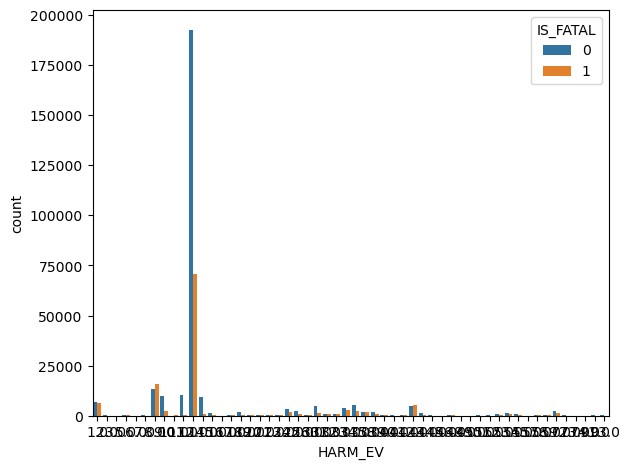

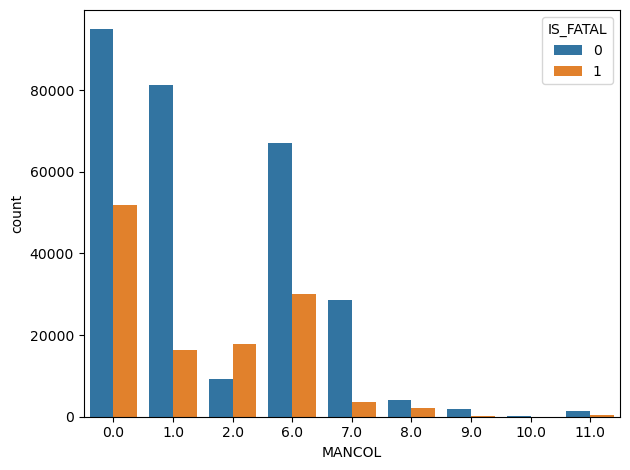

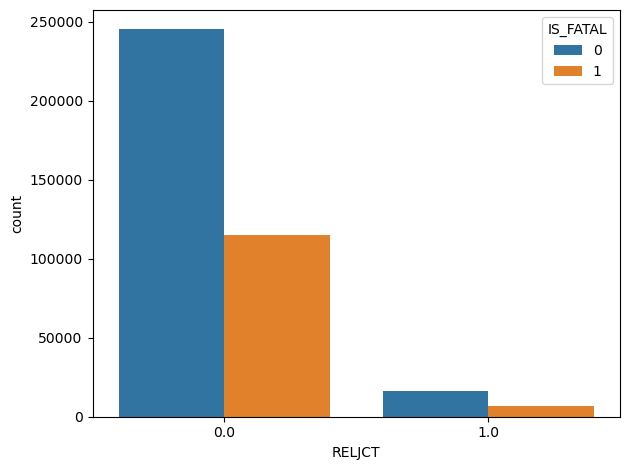

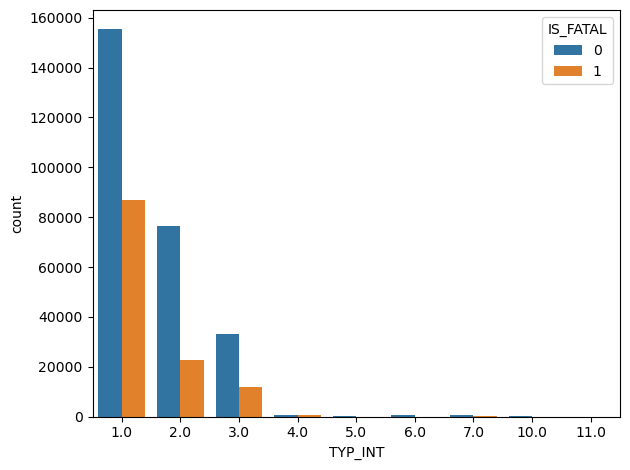

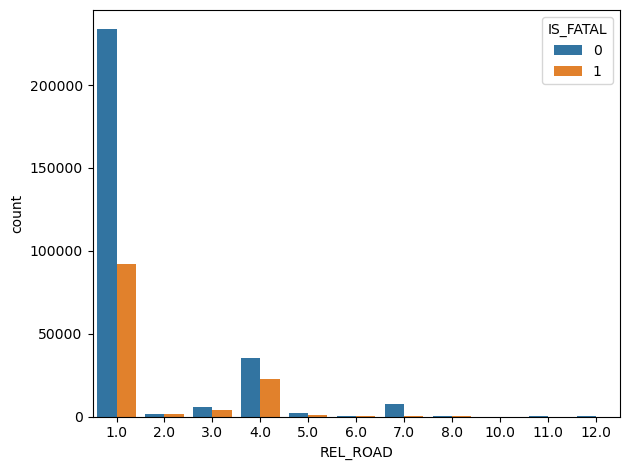

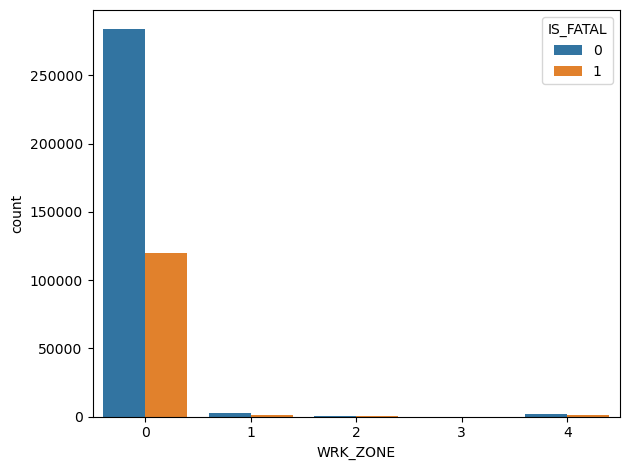

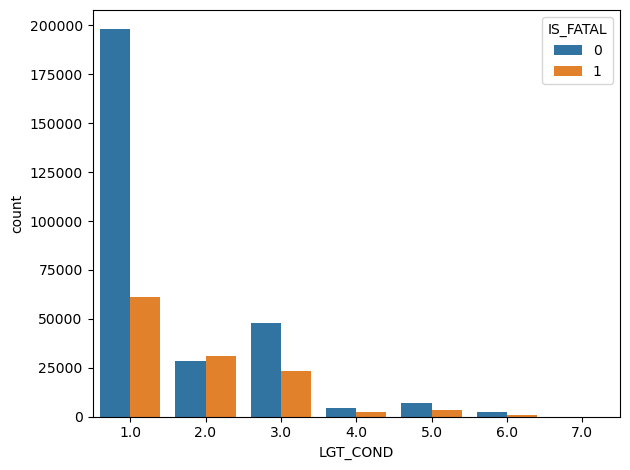

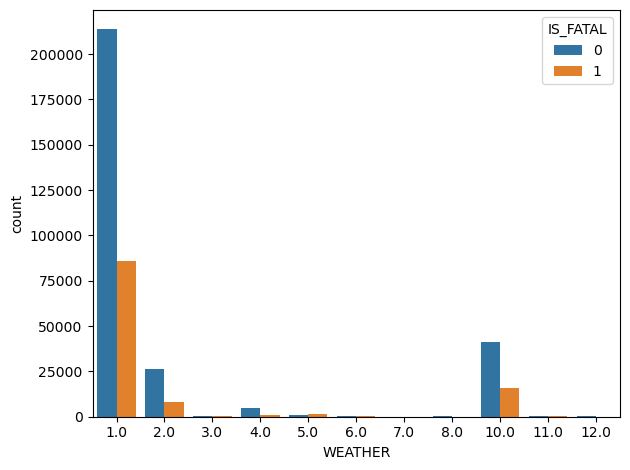

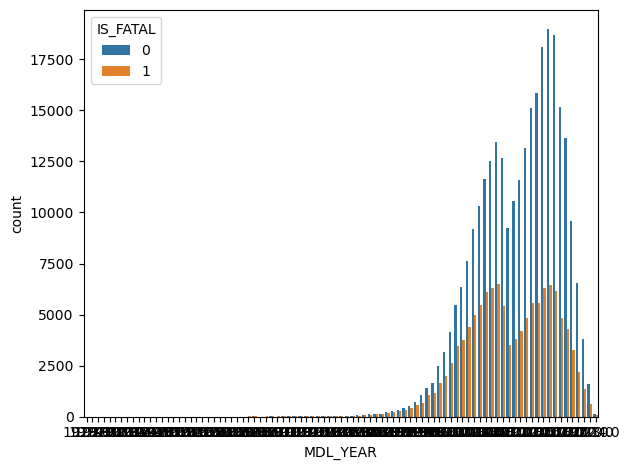

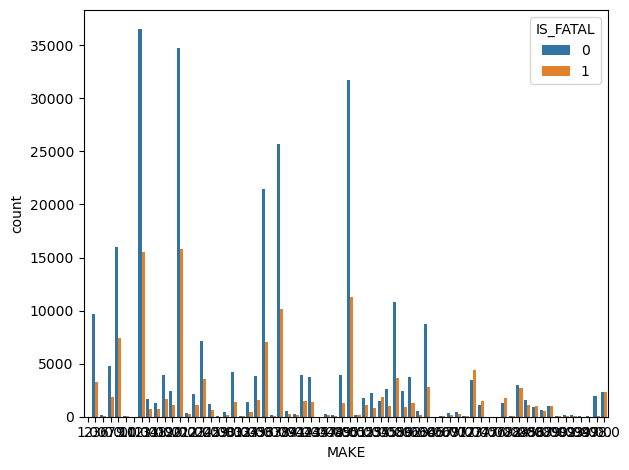

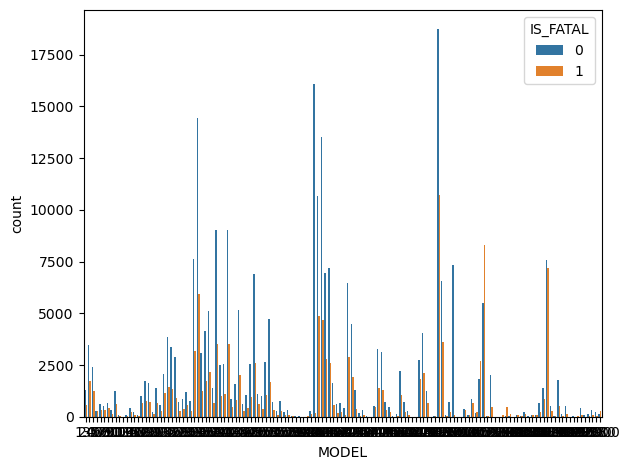

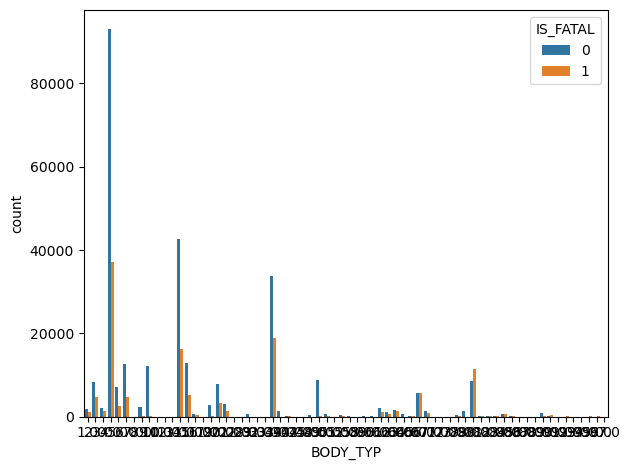

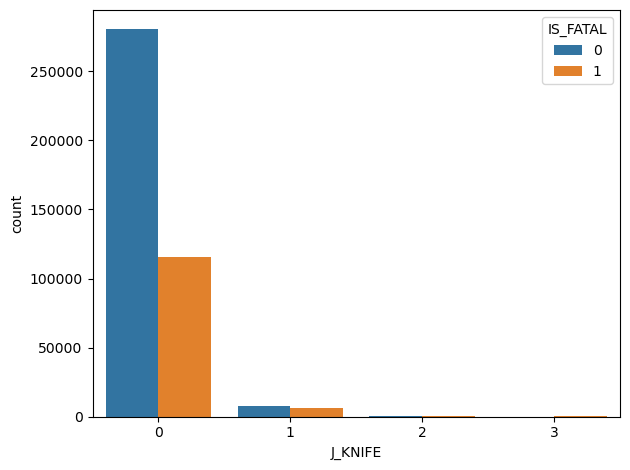

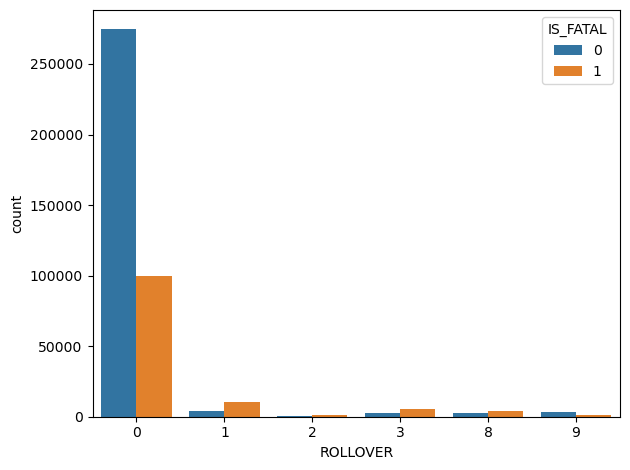

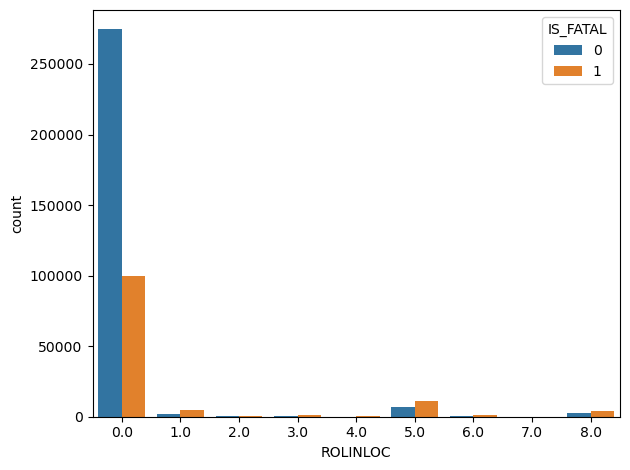

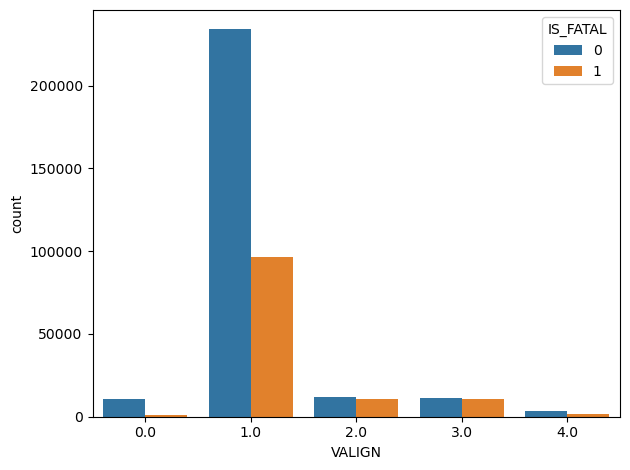

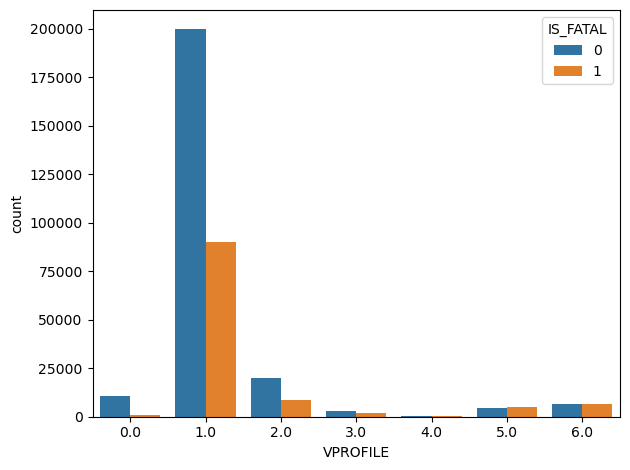

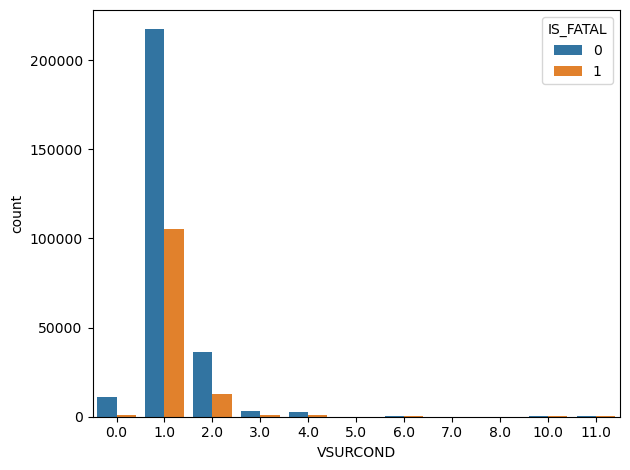

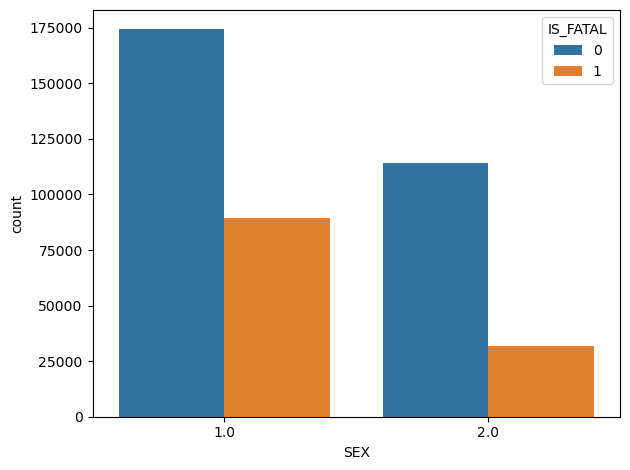

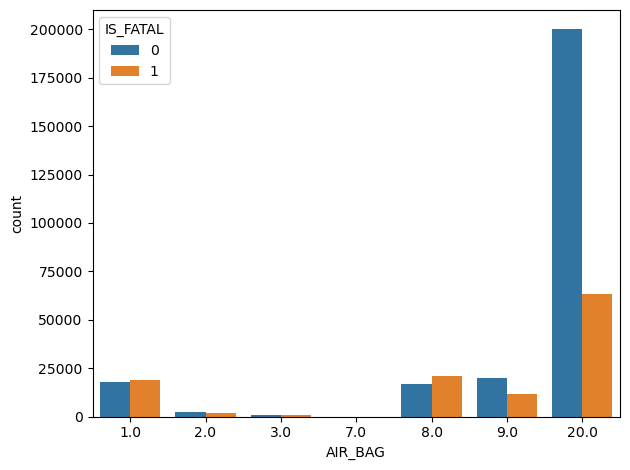

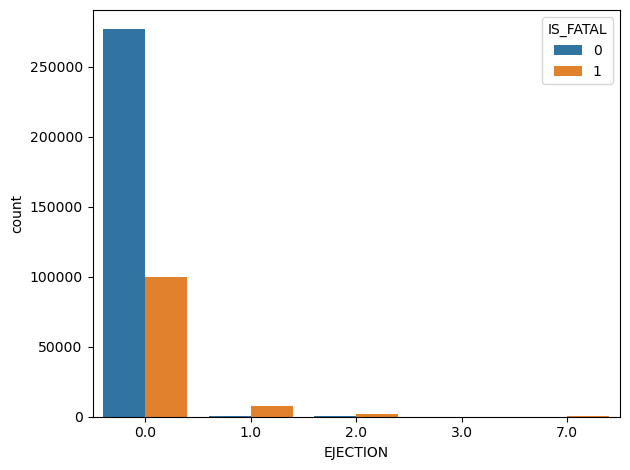

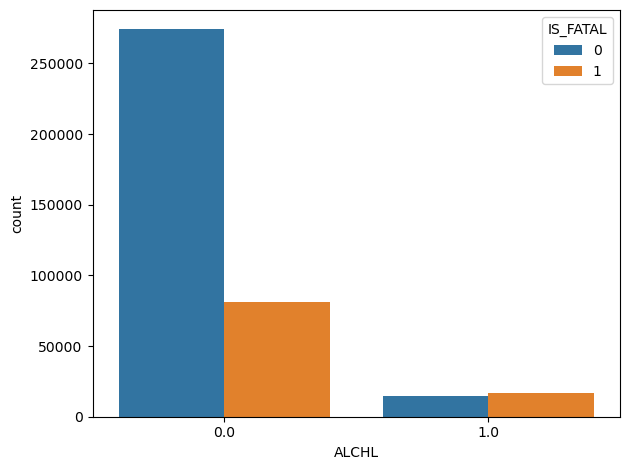

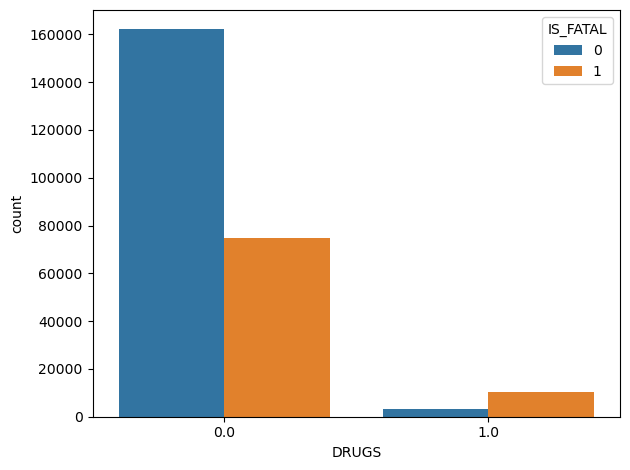

In [21]:
for col in cat_columns:
    plt.figure()
    sns.countplot(data=data, x=col, hue='IS_FATAL')
    plt.tight_layout()
    plt.show()

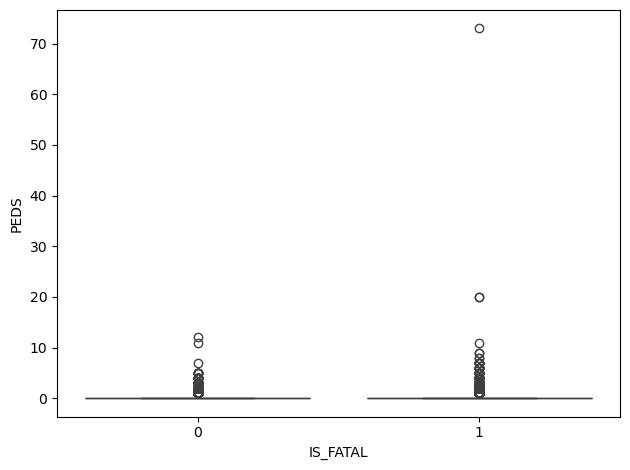

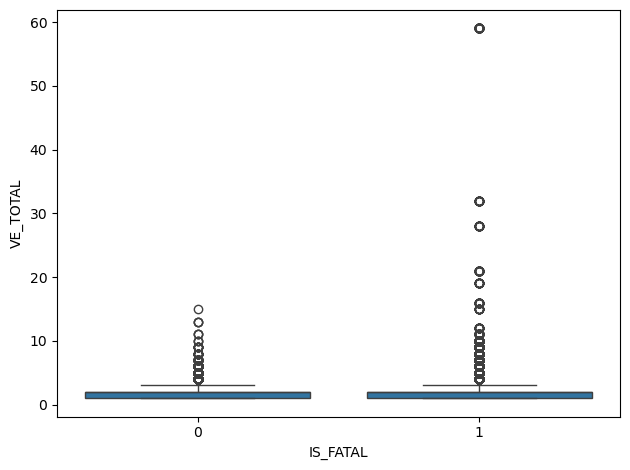

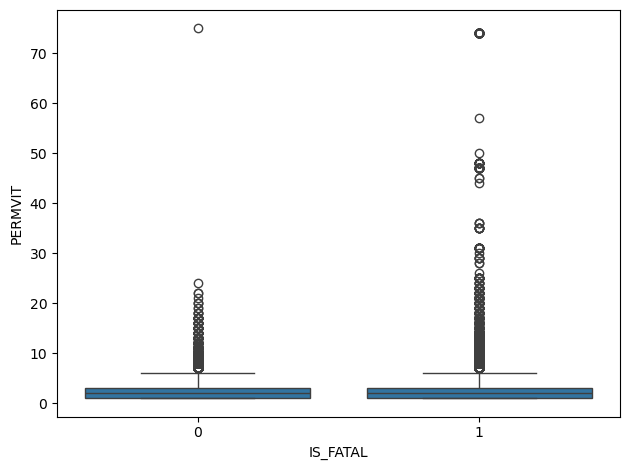

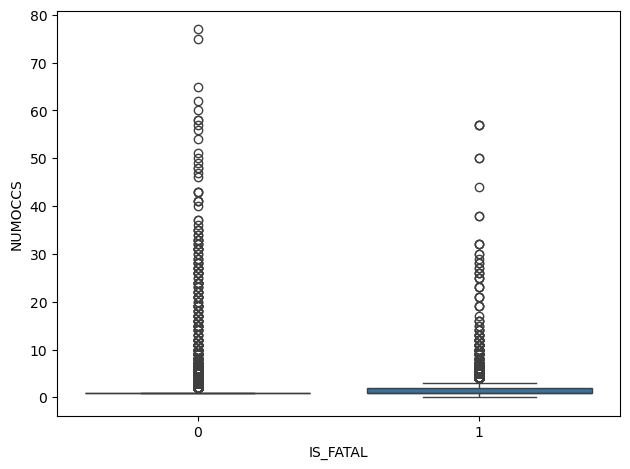

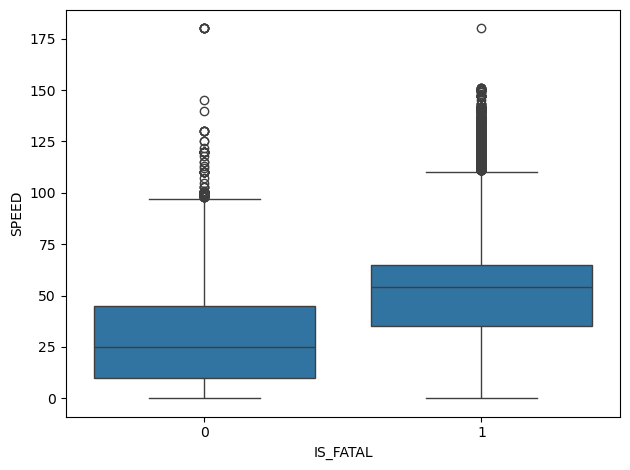

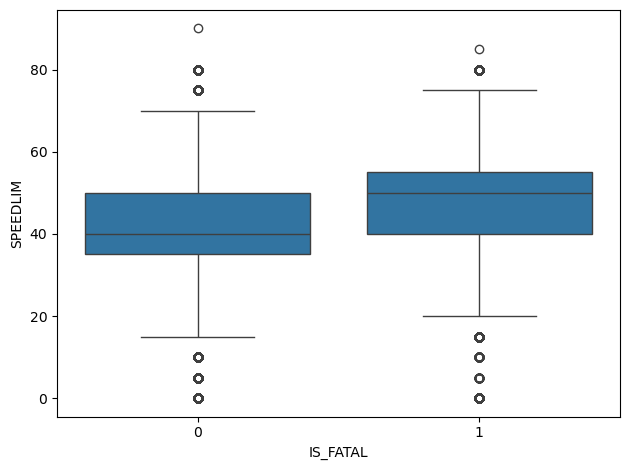

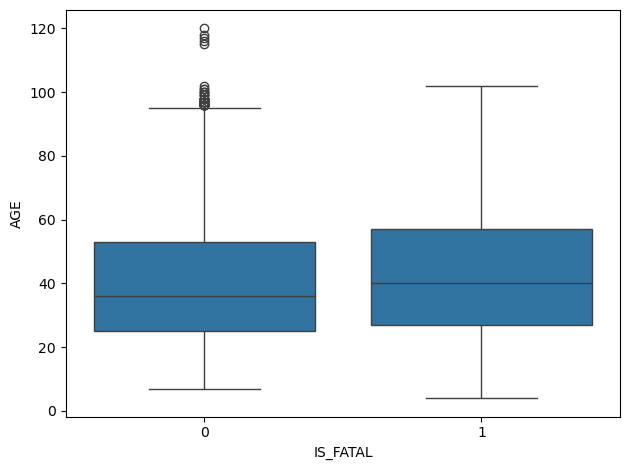

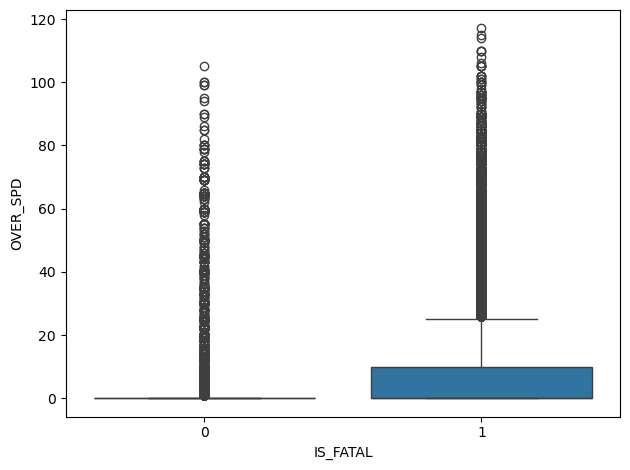

In [22]:
for col in num_columns:
    plt.figure()
    sns.boxplot(data=data, y=col, x=target)
    plt.tight_layout()
    plt.show()


### __Data Preprocessing__

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD

nb_preprocess = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), num_columns),
        ('cat_svd', Pipeline([
            ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=True)),
            ('svd', TruncatedSVD(n_components=50, random_state=42))
        ]), cat_columns)
    ],
    remainder='drop'
)

svm_preprocess = ColumnTransformer(
    transformers = [
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), num_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_columns)
    ],
    remainder='drop'
)

### __Bootstrapping data__

In [8]:
# defining a funciton that makes it easy to bootstrap the data
def bootstrap_once(X, random_state):
    rng = np.random.RandomState(random_state)
    boot_idx = rng.randint(0, len(X), len(X))
    X_boot = X.iloc[boot_idx]
    oob_idx = np.setdiff1d(np.arange(len(X)), boot_idx)
    X_oob = X.iloc[oob_idx]
    return X_boot, X_oob

In [9]:
nb_boot, nb_oob = bootstrap_once(data, 1)
svm_boot, svm_oob = bootstrap_once(data, 2)

### __Making Pipelines__

In [9]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB

nb_pipe = Pipeline([
    ('preprocess', nb_preprocess),
    ('clf', GaussianNB())
])

base_svm = LinearSVC(
    penalty = 'l2',
    loss = 'squared_hinge',
    dual = False,
    max_iter = 10000
)

clf_svm = CalibratedClassifierCV(
    estimator=base_svm,
    method='sigmoid',
    cv=3
)

svm_pipe = Pipeline([
    ('preprocess', svm_preprocess),
    ('clf', clf_svm)
])

### __Making Hyperparameter Grid__

In [10]:
nb_params = {
    'clf__var_smoothing': np.logspace(-4.5, -3.5, 5)
}

svm_params = {
    'clf__estimator__C': np.logspace(-1, 2.5, 8),
    'clf__estimator__class_weight': [None, 'balanced']
}

### __Doing Hyperparameter Tuning__

In [11]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score

nb_search = GridSearchCV(
    nb_pipe,
    nb_params,
    cv = 3,
    n_jobs = 1,
    scoring = 'roc_auc'
)

svm_search = RandomizedSearchCV(
    svm_pipe,
    svm_params,
    n_iter = 12,
    cv = 3,
    n_jobs = 1,
    scoring = 'roc_auc'
)

#### __Gaussian Naive Bayes__

_Doing the Gaussian Naive Bayes Fit_

In [10]:
# for hyperparameter tuning
nb_X = data.drop(columns='IS_FATAL')
nb_y = data['IS_FATAL']

# for training model
nb_X_train = nb_boot.drop(columns='IS_FATAL')
nb_y_train = nb_boot['IS_FATAL']

nb_X_test = nb_oob.drop(columns='IS_FATAL')
nb_y_test = nb_oob['IS_FATAL']

In [29]:
# hyperparameter tuning

nb_search.fit(nb_X, nb_y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(strategy='median'),
                                                                         ['PEDS',
                                                                          'VE_TOTAL',
                                                                          'PERMVIT',
                                                                          'NUMOCCS',
                                                                          'SPEED',
                                                                          'SPEEDLIM',
                                                                          'AGE',
                                                                          'OVER_SPD']),
                                                                        ('cat_svd',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore')),
                                                                                         ('svd',
                                                                                          TruncatedSVD(n_components=50,
                                                                                                       random_state=42))]),
                                                                         ['MONTH',
                                                                          'DAY...
                                                                          'LGT_COND',
                                                                          'WEATHER',
                                                                          'MDL_YEAR',
                                                                          'MAKE',
                                                                          'MODEL',
                                                                          'BODY_TYP',
                                                                          'J_KNIFE',
                                                                          'ROLLOVER',
                                                                          'ROLINLOC',
                                                                          'VALIGN',
                                                                          'VPROFILE',
                                                                          'VSURCOND',
                                                                          'SEX',
                                                                          'AIR_BAG',
                                                                          'EJECTION',
                                                                          'ALCHL',
                                                                          'DRUGS'])])),
                                       ('clf',
                                        GaussianNB(var_smoothing=0.0001))]),
             n_jobs=1,
             param_grid={'clf__var_smoothing': array([3.16227766e-05, 5.62341325e-05, 1.00000000e-04, 1.77827941e-04,
       3.16227766e-04])},
             scoring='roc_auc')

In [37]:
print('Best Params: ', nb_search.best_params_)

Best Params:  {'clf__var_smoothing': 0.0001}


_Training model on the best parameters on the bootstrapped data and testing on OOB_

In [ ]:
nb_pipe.set_params(clf__var_smoothing=0.0001)
nb_pipe.fit(nb_X_train, nb_y_train)

nb_result = nb_pipe.predict(nb_X_test)
roc_auc_score(nb_result, nb_y_test)

0.8038866037539301

_Result of the final Gaussian Naive Bayes Model_

In [18]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

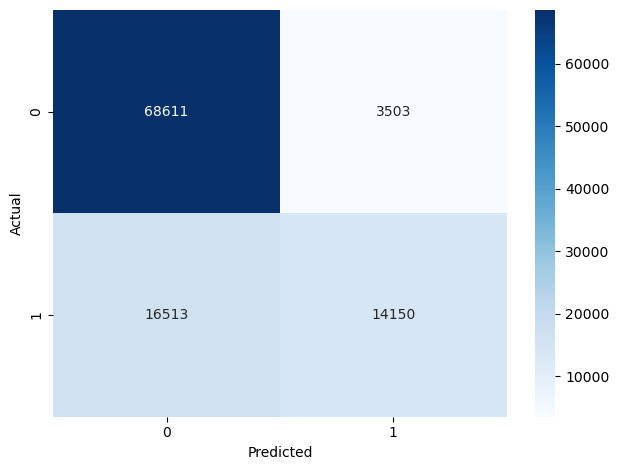

In [50]:
preds = nb_model.predict(test.drop(columns=['CASENUM', 'IS_FATAL']))
cm = confusion_matrix(test['IS_FATAL'], preds)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

_Saving the Gaussian Naive Bayes Model_

In [35]:
import joblib

joblib.dump(nb_pipe, './models/naive_bayes.pkl')

['./models/naive_bayes.pkl']

_Run this to load the Gaussian Naive Bayes Model_

In [8]:
import joblib

nb_model = joblib.load('./models/naive_bayes.pkl')

#### __SVM__

_Doing the SVM fit_

In [23]:
# for hyperparameter tuning
svm_X = nb_X
svm_y = nb_y

# for training model
svm_X_train = svm_boot.drop(columns='IS_FATAL')
svm_y_train = svm_boot['IS_FATAL']

svm_X_test = svm_oob.drop(columns='IS_FATAL')
svm_y_test = svm_oob['IS_FATAL']

In [14]:
# hyperparameter tuning

svm_search.fit(svm_X, svm_y)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['PEDS',
                                                                                'VE_TOTAL',
                                                                                'PERMVIT',
                                                                                'NUMOCCS',
                                                                                'SPEED',
                                                                                'SPEEDLIM',
                                                                                'AGE',
                                                                                'OVER_SPD']),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['MONTH',
                                                                                'DAY_WEEK',
                                                                                'YEAR',
                                                                                'HOUR'...
                                                                                'DRUGS'])])),
                                             ('clf',
                                              CalibratedClassifierCV(cv=3,
                                                                     estimator=LinearSVC(dual=False,
                                                                                         max_iter=10000)))]),
                   n_iter=12, n_jobs=1,
                   param_distributions={'clf__estimator__C': array([1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02]),
                                        'clf__estimator__class_weight': [None,
                                                                         'balanced']},
                   scoring='roc_auc')

In [15]:
print('SVM best parameters: ', svm_search.best_params_)

SVM best parameters:  {'clf__estimator__class_weight': 'balanced', 'clf__estimator__C': 0.31622776601683794}


In [16]:
svm_pipe.set_params(clf__estimator__class_weight='balanced', clf__estimator__C=0.31622776601683794)
svm_pipe.fit(svm_X_train, svm_y_train)

svm_result = svm_pipe.predict(svm_X_test)
roc_auc_score(svm_result, svm_y_test)

0.8851558281740812

In [15]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

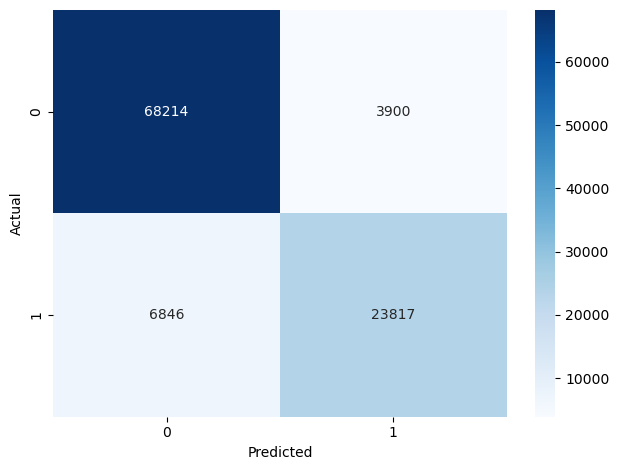

In [48]:
preds = svm_model.predict(test.drop(columns=['CASENUM', 'IS_FATAL']))
cm = confusion_matrix(test['IS_FATAL'], preds)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

_Saving the SVM model_

In [18]:
import joblib

joblib.dump(svm_pipe, './models/svm.pkl')

['./models/svm.pkl']

_Run this to load the SVM model_

In [7]:
import joblib

svm_model = joblib.load('./models/svm.pkl')

#### __Decision Tree__

_Loading Decision Tree Model_

In [2]:
import joblib

dt_model = joblib.load('./models/dt.pkl')

d:\Anaconda\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.7.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator FunctionTransformer from version 1.7.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator ColumnTransformer from version 1.7.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use a

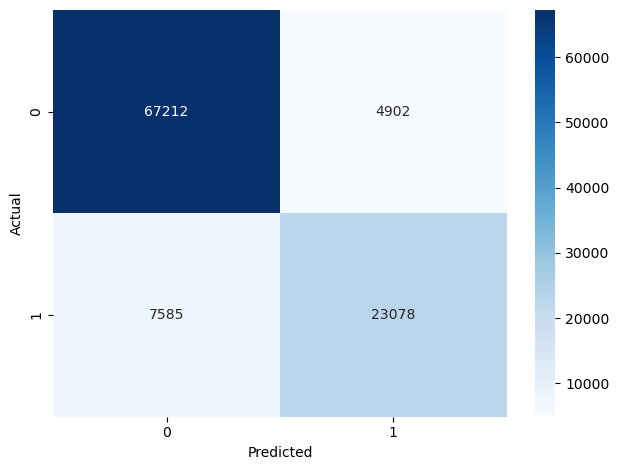

In [16]:
preds = dt_model.predict(test.drop(columns=['CASENUM', 'IS_FATAL']))
cm = confusion_matrix(test['IS_FATAL'], preds)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

#### __Random Forest__

_Loading Random Forest Classifier_

In [54]:
import joblib

rf_model = joblib.load('./models/rf.pkl')

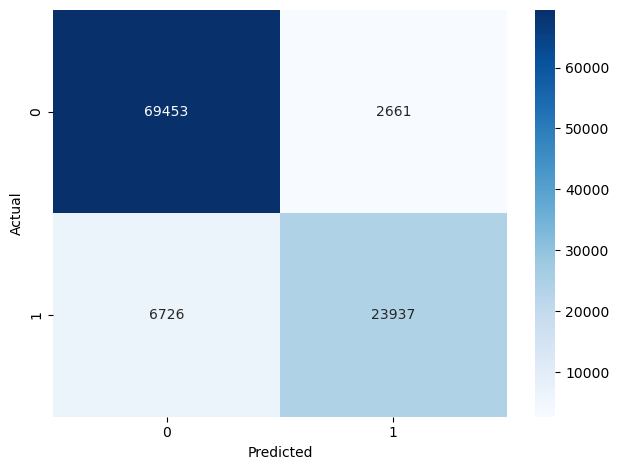

In [55]:
preds = rf_model.predict(test.drop(columns=['CASENUM', 'IS_FATAL']))
cm = confusion_matrix(test['IS_FATAL'], preds)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

#### __KNN Classifier__

_Loading the KNN Classifier_

In [18]:
import joblib

knn_model = joblib.load('./models/knn.pkl')

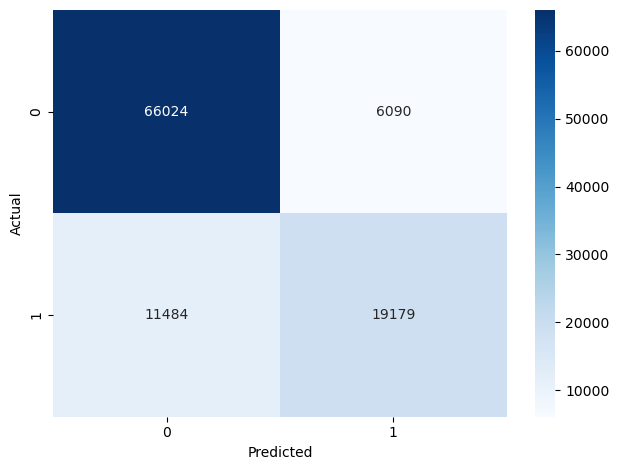

In [19]:
preds = knn_model.predict(test.drop(columns=['CASENUM', 'IS_FATAL']))
cm = confusion_matrix(test['IS_FATAL'], preds)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

#### __Logistic Regression__

_Loading the Logistic Regression model_

In [20]:
import joblib

lr_model = joblib.load('./models/lr.pkl')

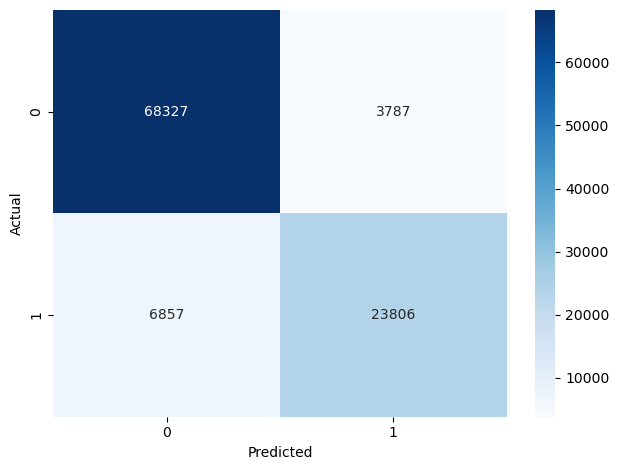

In [21]:
preds = lr_model.predict(test.drop(columns=['CASENUM', 'IS_FATAL']))
cm = confusion_matrix(test['IS_FATAL'], preds)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

#### __All models__

_ROC curve of all the models_

In [36]:
models = [
    ("SVM/SVC", svm_model),
    ('Naive-Bayes', nb_model),
    ('Decision Tree', dt_model),
    ('Random Forest', rf_model),
    ('KNN Classifier', knn_model),
    ('Logistic Regressor', lr_model)
]

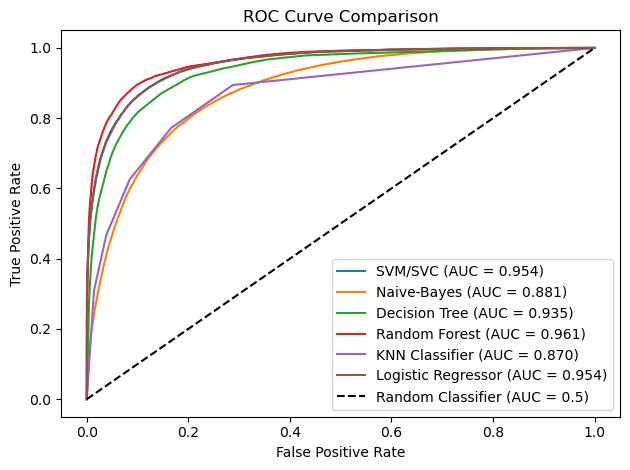

In [56]:
plt.figure()
for name, model in models:
    preds = model.predict_proba(test.drop(columns=['CASENUM', 'IS_FATAL']))[:, 1]
    fpr, tpr, _ = roc_curve(test['IS_FATAL'], preds)
    nb_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {nb_auc:.3f})")
plt.plot([0,1], [0,1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()

_Error Correlation between each model_

In [13]:
def pred_error(model):
    return (model.predict(test.drop(columns=['CASENUM', 'IS_FATAL'])) != test['IS_FATAL']).astype(int)

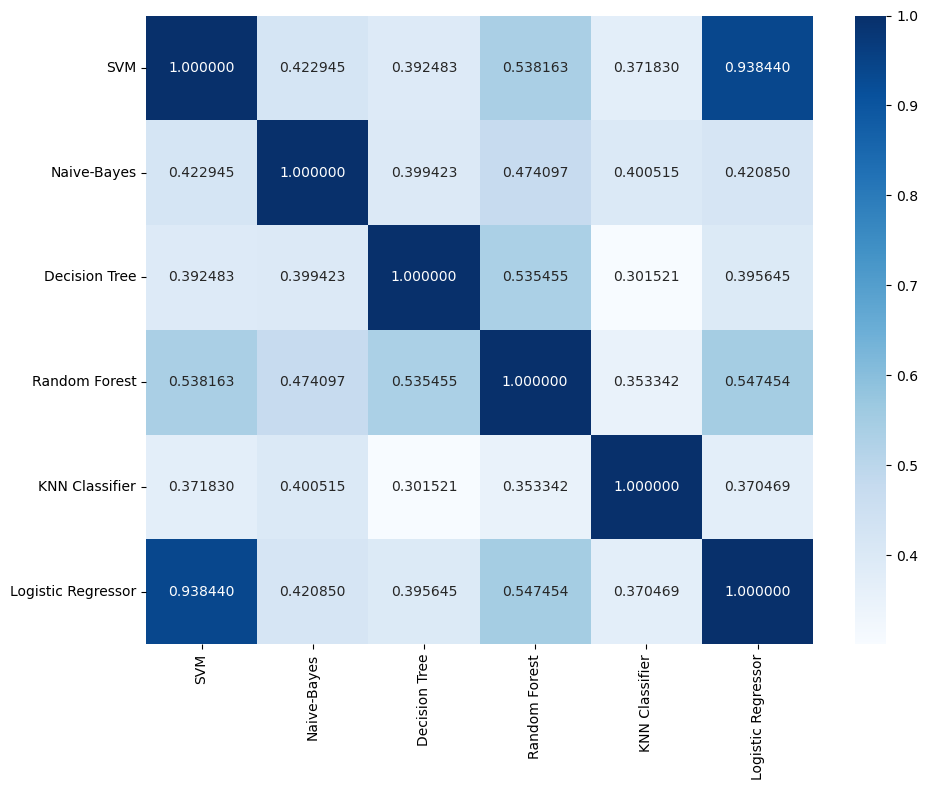

In [57]:
model_errors = np.column_stack([
    pred_error(svm_model),
    pred_error(nb_model), 
    pred_error(dt_model),
    pred_error(rf_model),
    pred_error(knn_model),
    pred_error(lr_model)
])
model_names = [
    'SVM', 
    'Naive-Bayes', 
    'Decision Tree',
    'Random Forest',
    'KNN Classifier',
    'Logistic Regressor'
]
corr = np.corrcoef(model_errors, rowvar=False)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='f', cmap='Blues', xticklabels=model_names, yticklabels=model_names)
plt.tight_layout()
plt.show()

As we can see logistic regressor and svm have a high error correlation. Hence, we should use either of them for the ensemble but not both.

#### __Ensemble__

In [58]:
def ensemble_proba(X):
    prob_lr = lr_model.predict_proba(X)[:, 1]
    prob_nb = nb_model.predict_proba(X)[:, 1]
    prob_rf = rf_model.predict_proba(X)[:, 1]
    prob_knn = knn_model.predict_proba(X)[:, 1]

    return (prob_lr + prob_nb + prob_rf + prob_knn) / 4

def ensemble(X):
    return (ensemble_proba(X) >= 0.5).astype(int)

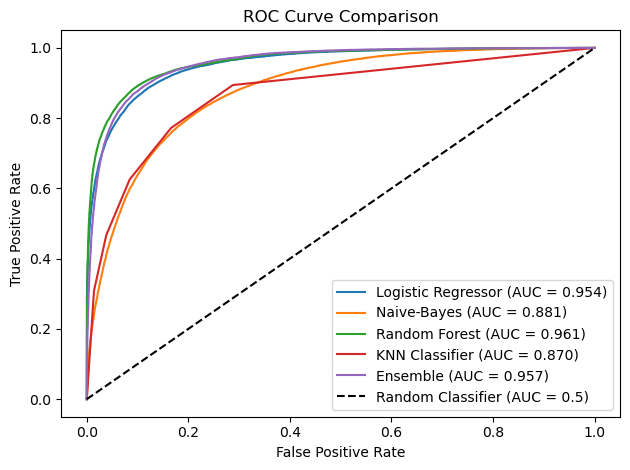

In [59]:
ensem_models = [
    ("Logistic Regressor", lr_model),
    ("Naive-Bayes", nb_model),
    ("Random Forest", rf_model),
    ('KNN Classifier', knn_model),
]
plt.figure()
for name, model in ensem_models:
    preds = model.predict_proba(test.drop(columns=['CASENUM', 'IS_FATAL']))[:, 1]
    fpr, tpr, _ = roc_curve(test['IS_FATAL'], preds)
    nb_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {nb_auc:.3f})")
preds = ensemble_proba(test.drop(columns=['CASENUM', 'IS_FATAL']))
fpr, tpr, _ = roc_curve(test['IS_FATAL'], preds)
nb_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Ensemble (AUC = {nb_auc:.3f})")
plt.plot([0,1], [0,1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()

Our Random Forest is doing even better than the Ensemble we had. So we can take the Random forest as our final model.

In [62]:
final_estimator = rf_model

import joblib
joblib.dump(final_estimator, './models/final.pkl')

['./models/final.pkl']

Shown below are the important features that can lead to fatal accidents

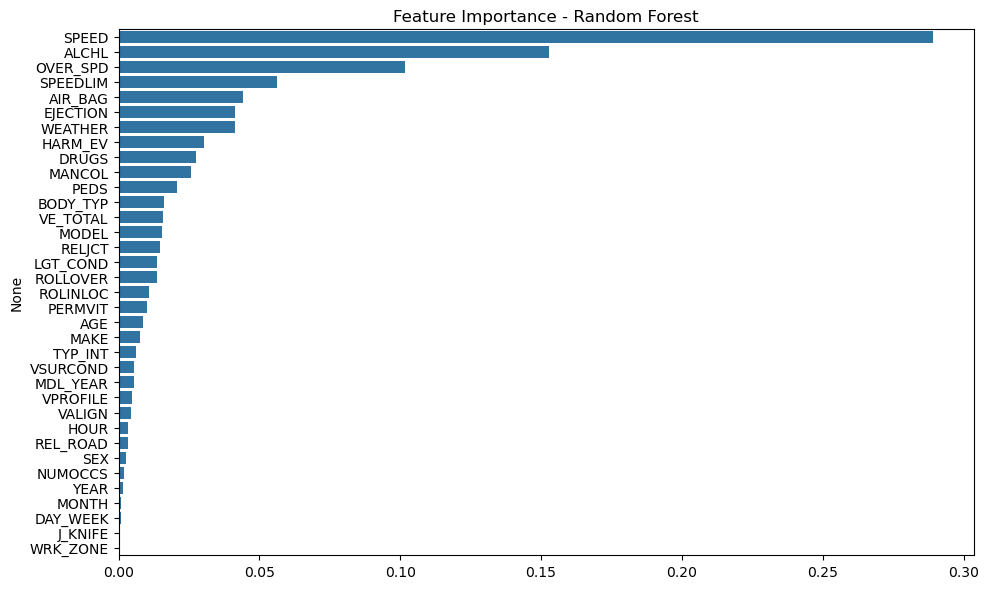

In [67]:
importances = final_estimator.named_steps['clf'].feature_importances_
features = data.columns
order = np.argsort(importances)[::-1]

features = data.columns[order]
importances = importances[order]

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()

In [69]:
importances[:4].sum()

0.5996841459962814

Therefore, factors like speed (vehicle speed, overspeed, speed limit) and alchohol consumption are the dominant features. These 4 features alone sum upto ~60% of the importance.

We can also check the heatmap of fatal accident using the FARS data as done below:

In [2]:
fars = pd.read_csv('./data/fars.csv')

In [5]:
import plotly.express as px

fig = px.density_map(
    fars,
    lat='LATITUDE',
    lon='LONGITUD',
    radius=1,
    center={'lat': 37.5, 'lon':-98.35},
    zoom=3.25,
    map_style='open-street-map',
    height=600
)

fig.show()